In [2]:
# Market Structure Analysis: Trading Activity and Price Impact
# Author: Prof. Paul Goldsmith-Pinkham
# Course: MGT 544 - Investment Management

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_palette("husl")

# Market Structure Analysis: Understanding Trading Activity

This notebook explores different dimensions of market structure by analyzing:
1. Trading volume - indicating market activity and liquidity
2. Price ranges - a proxy for volatility and bid-ask spreads
3. Time variation in these measures

We'll compare these across different types of stocks:
- Large tech (AAPL, NVDA)
- Market index (SPY)
- Meme stock (GME)
- Traditional retail (KSS)

[*********************100%***********************]  1 of 1 completed


250.4199981689453


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

134.2899932861328



[*********************100%***********************]  1 of 1 completed

586.0800170898438



[*********************100%***********************]  1 of 1 completed

31.34000015258789


14.039999961853027

Market Structure Summary Statistics:
     Avg Daily Volume Avg Daily Range % Avg Daily $ Volume Market Cap
AAPL      229,920,029             1.99%              $7.8B   $3765.8B
NVDA      496,995,540             3.30%              $5.8B   $3288.8B
SPY       111,805,060             1.12%             $23.1B         $0
GME        17,467,161             5.15%            $241.1M     $14.0B
KSS         4,382,372             3.24%            $126.0M      $1.6B


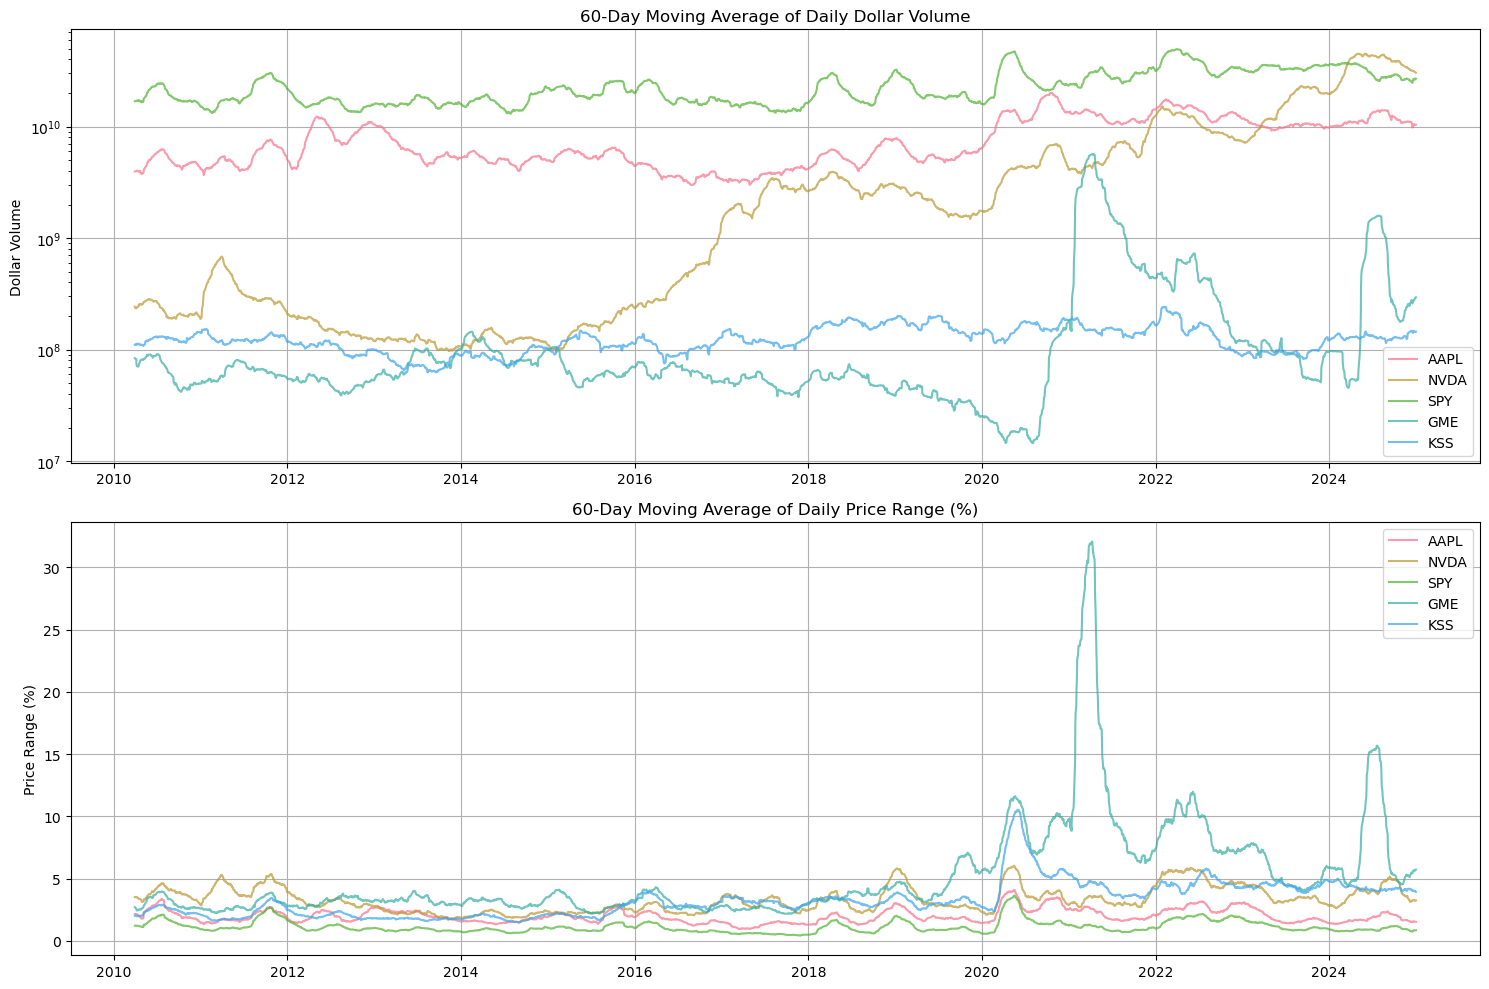

In [3]:

# Download data with volume
tickers = ['AAPL', 'NVDA', 'SPY', 'GME', 'KSS']

data = {}
date_start = '2010-01-01'
date_end   = '2020-01-01'

# Function to format large numbers
def format_number(num):
    if num >= 1e9:
        return f'${num/1e9:.1f}B'
    elif num >= 1e6:
        return f'${num/1e6:.1f}M'
    else:
        return f'${num:,.0f}'


for ticker in tickers:
    print(f"Downloading data for {ticker}...")
    temp = yf.download(ticker, start=date_start, end=date_end)
    data[ticker] = temp[['Volume', 'High', 'Low', 'Close']].copy()

    # Calculate market cap at end of period
    last_price = data[ticker]['Close'].iloc[-1]
    info = yf.Ticker(ticker).info
    shares = info.get('sharesOutstanding', 0)
    print(last_price.item())
    data[ticker]['market_cap'] = last_price.item() * shares

    # Calculate daily measures
    data[ticker]['daily_range'] = (
        data[ticker]['High'] - data[ticker]['Low'])/data[ticker]['Close']
    data[ticker]['dollar_volume'] = data[ticker]['Volume'] * data[ticker]['Close']

    # Calculate rolling measures
    data[ticker]['avg_volume'] = data[ticker]['Volume'].rolling(20).mean()
    data[ticker]['avg_range'] = data[ticker]['daily_range'].rolling(20).mean()

# Create summary statistics table
summary_stats = pd.DataFrame(columns=[
                             'Avg Daily Volume', 'Avg Daily Range %', 'Avg Daily $ Volume', 'Market Cap'])

for ticker in tickers:
    summary_stats.loc[ticker] = [
        f"{data[ticker]['Volume'].mean().item():,.0f}",
        f"{data[ticker]['daily_range'].mean().item()*100:.2f}%",
        format_number(data[ticker]['dollar_volume'].mean().item()),
        format_number(data[ticker]['market_cap'].iloc[-1])
    ]

print("\nMarket Structure Summary Statistics:")
print(summary_stats)

# Plotting
plt.figure(figsize=(15, 10))

# Plot 1: Dollar Volume Over Time
plt.subplot(2, 1, 1)
for ticker in tickers:
    plt.plot(data[ticker].index, data[ticker]['dollar_volume'].rolling(60).mean(),
             label=ticker, alpha=0.7)
plt.title('60-Day Moving Average of Daily Dollar Volume')
plt.ylabel('Dollar Volume')
plt.yscale('log')
plt.legend()
plt.grid(True)

# Plot 2: Daily Range Over Time
plt.subplot(2, 1, 2)
for ticker in tickers:
    plt.plot(data[ticker].index, data[ticker]['daily_range'].rolling(60).mean() * 100,
             label=ticker, alpha=0.7)
plt.title('60-Day Moving Average of Daily Price Range (%)')
plt.ylabel('Price Range (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Key Observations:

1. **Market Size and Activity**:
   - Large tech stocks (AAPL, NVDA) show high dollar volume but moderate price ranges
   - The SPY ETF demonstrates the highest and most stable dollar volume
   - GME shows relatively low dollar volume pre-2021 (before the meme stock era)

2. **Price Impact**:
   - Higher price ranges often indicate larger bid-ask spreads and potential price impact
   - More volatile stocks tend to have larger price ranges
   - Market structure changes are visible through time-series patterns

3. **Business Implications**:
   - Trading costs vary significantly across different types of stocks
   - Market liquidity (as measured by dollar volume) affects execution quality
   - Understanding these patterns is crucial for portfolio management